In [1]:
from MEA_analysis import backbone, stimulus_trace, spike_extractor, spike_plotly, single_stimulus
from importlib import reload  
import qgrid
#%matplotlib widget
from ipywidgets import interact, interact_manual, interactive
import ipywidgets as widgets
import numpy as np
import pandas as pd
import scipy
import pyspike as spk
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from MEA_analysis import stimulus_and_spikes as sp
from MEA_analysis import Overview
#import numpy.ma as ma
from Basic_scripts import Basic

In [3]:
trigger_file = backbone.SelectFilesButton("Stimulus")
widgets.VBox([trigger_file, trigger_file.out])

In [4]:
Test_stimulus = stimulus_trace.Stimulus_Extractor(trigger_file.files[0])
Test_stimulus.plot_trigger_channel_new("10ms")


FigureWidget({
    'data': [{'marker': {'color': [#1f77b4, #1f77b4, #1f77b4, ..., #1f77b4,
                   …

In [5]:
Test_stimulus.get_stim_range_new()

0


C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [6]:
Stimulus_table = qgrid.show_grid(Test_stimulus.stimuli)
Stimulus_table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
print([Test_stimulus.stimuli.iloc[i]["Trigger_int"].shape for i in range(len(Test_stimulus.stimuli))])

[(59,), (14,), (79,), (79,), (79,), (79,), (79,)]


In [8]:
Test_stimulus.get_changed_names(Stimulus_table)


In [9]:
spikes_file = backbone.SelectFilesButton("Spikes")
widgets.VBox([spikes_file, spikes_file.out])

In [20]:
reload(spike_extractor)
Spikes = spike_extractor.Recording_spikes(spikes_file.files[0])
thresholds = spike_extractor.Thresholds(Spikes.spikes, Test_stimulus)
overview = spike_plotly.Recording_overview(Spikes.spikes)
overview.plot_basic_recording_information(thresholds)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntText(value=33, description='Lower threshold:', style=DescriptionStyle(description_wid…

FloatText(value=0.49894912469939884, description='Lower threshold in spikes per minute:', style=DescriptionSty…

interactive(children=(IntText(value=1486, description='Upper threshold:', style=DescriptionStyle(description_w…

FloatText(value=22.479926018274668, description='Upper threshold in spikes per minute:', style=DescriptionStyl…

interactive(children=(IntText(value=0, description='Left Threshold', style=DescriptionStyle(description_width=…

interactive(children=(IntText(value=6119, description='Right Threshold', style=DescriptionStyle(description_wi…

In [21]:
#Load spikes
from MEA_analysis import stimulus_and_spikes
reload(stimulus_and_spikes)
Spikes.define_subset(thresholds.threshold_left_widget.value, thresholds.threshold_right_widget.value)
Spikes.define_thr(thresholds.threshold_up_widget.value, thresholds.threshold_low_widget.value)
spikes_df = Spikes.get_spikes(True, True)[2]

#Correlate spikes and stimuli
begin_idx, end_idx = sp.spikes_and_stimulus(spikes_df, Test_stimulus.stimuli)
stimulus_spikes = sp.extract_stimulus_spikes(spikes_df, Test_stimulus.stimuli['Stimulus_name'], begin_idx, end_idx, np.array(Test_stimulus.stimuli['Begin_Fr'][:], dtype=int))

In [22]:
complete_dataframe = pd.DataFrame(columns=('Cell index', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus ID', 'Stimulus name', 'Spikes'))
row = 0

for cell in range(len(spikes_df)):
       
    for stimulus in range(len(stimulus_spikes)):
        nr_spikes_new = np.count_nonzero(~stimulus_spikes['Spikes'][stimulus][:, cell].mask)
        area_new =  spikes_df['Area'].loc[cell]* (nr_spikes_new/spikes_df['Nr of spikes'].loc[cell])
        complete_dataframe.loc[row] = [spikes_df['Cell index'].loc[cell], spikes_df['Centres x'].loc[cell],  spikes_df['Centres y'].loc[cell],
                                       nr_spikes_new, area_new, stimulus, 
                                       Test_stimulus.stimuli['Stimulus_name'][stimulus], stimulus_spikes['Spikes'][stimulus][:, cell]]
        row = row+1

        
multi_complete_dataframe = complete_dataframe.set_index(['Cell index', 'Stimulus ID', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus name'])
complete_dataset = qgrid.show_grid(multi_complete_dataframe)
complete_dataset

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [127]:
#multi_complete_dataframe.to_pickle(Test_stimulus.recording_folder+"spikes_for_overview", compression="zip")
#Test_stimulus.stimuli.to_pickle(Test_stimulus.recording_folder+"stimulus_overview", compression="zip")

In [23]:
stimulus_extr = single_stimulus.Single_stimulus_spikes(multi_complete_dataframe, Test_stimulus)

In [343]:
def kernel_template(width=0.01):
    
    fwhm = int((Test_stimulus.sampling_frequency[0])*width) # in points

    # normalized time vector in ms
    k = int((Test_stimulus.sampling_frequency[0])*0.02)
    gtime = np.arange(-k,k)

    # create Gaussian window
    gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
    gauswin = gauswin / np.sum(gauswin)

    # initialize filtered signal vector
    return gauswin

def spike_padding(spikes, trial_n):
    
    stim_time=np.zeros(len(np.linspace(0,int(4.05*6*Test_stimulus.sampling_frequency[0]),num=int(4.05*6*Test_stimulus.sampling_frequency[0]), endpoint=False)))
    
    for sp_times in range(len(spikes[trial_n])):
        stim_time[int(spikes[trial_n][sp_times])]=1
        
    return stim_time

def spike_padding_new(stim_time, spikes, trial_n):
    
    stim_time[trial_n][list(spikes[trial_n].astype(int))]=1
    return stim_time

def calc_tradqi(kernelfits):
    return np.var(np.mean(kernelfits,0))/np.mean(np.var(kernelfits,0))

def fast_qi(spikes, stimulus_traits, repeat_duration):
    exs=np.zeros((stimulus_traits['stim_repeats'], int(Test_stimulus.sampling_frequency[0])*int(repeat_duration)))
    for trial in range(len(spikes)):
        a=np.zeros((len(spikes[trial]), int(Test_stimulus.sampling_frequency[0])*int(repeat_duration)))
        for idx, spike in enumerate(spikes[trial]):
            #print(np.ceil(spike-(len(gauswin)/2)))
            try:
                a[idx][int(spike-(len(gauswin)/2)):int(spike-(len(gauswin)/2))+len(gauswin)]=gauswin
            except ValueError:
                if np.ceil(spike-(len(gauswin)/2))<0:
                    a[idx][0:len(gauswin)-int((len(gauswin)/2)-np.ceil(spike))]=gauswin[int((len(gauswin)/2)-np.ceil(spike)):]
                elif np.ceil(spike+(len(gauswin)/2))>int(repeat_duration)*int(Test_stimulus.sampling_frequency[0]):
                    #try:
                    a[idx][int(spike-(len(gauswin)/2)):]=gauswin[:int(repeat_duration)*int(Test_stimulus.sampling_frequency[0])-int(spike-(len(gauswin)/2))]
                    #except ValueError:
                        #print(spike, int(24*Test_stimulus.sampling_frequency[0]-int(spike-(len(gauswin)/2))) )
                else:
                    print('TF')
        exs[trial]=np.sum(a,0)
    return calc_tradqi(exs)

def fast_qi_exclusive(spikes, stimulus_traits, repeat_duration):
    exs=np.zeros((stimulus_traits['stim_repeats'], int(Test_stimulus.sampling_frequency[0])*int(repeat_duration)))
    for trial in range(len(spikes)):
        a=np.zeros((len(spikes[trial]), int(Test_stimulus.sampling_frequency[0])*int(repeat_duration)))
        for idx, spike in enumerate(spikes[trial]):
            #print(np.ceil(spike-(len(gauswin)/2)))
            try:
                a[idx][int(spike-(len(gauswin)/2)):int(spike-(len(gauswin)/2))+len(gauswin)]=gauswin
            except ValueError:
                continue
                    #except ValueError:
                        #print(spike, int(24*Test_stimulus.sampling_frequency[0]-int(spike-(len(gauswin)/2))) )
        exs[trial]=np.sum(a,0)
    return calc_tradqi(exs)    

### Currently you can skip importing the following packages as we are not timing or paralellizing anything

In [25]:
import multiprocessing as mp
from functools import partial
import time

In [390]:
def calculate_qi(stim_idx:list, cell_idces=None, kernel_width=0.0125):
    stimulus_extr.load_spikes_for_stimulus(stim_idx)
    if (cell_idces==None).all:
        chosen_ones= stimulus_extr.spikes_stimulus.index.get_level_values(0).values
    #cell_idces= stimulus_extr.spikes_stimulus.index.get_level_values(0).values if not cell_idces else cell_idces
    offic_test=np.zeros(len(cell_idces)) 
    

        


    print(stimulus_extr.spikes_stimulus.index[0][-1])
    stimulus_traits= Basic.get_stimulus_traits(Test_stimulus.stimuli, stim_idx)
    repeat_duration= np.floor((Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][stimulus_traits['stim_trials']]-Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][0])
                              /Test_stimulus.sampling_frequency[0])
    print('Repeat duration:' , repeat_duration )


    gauswins=np.tile(kernel_template(width=kernel_width)[::-1], (stimulus_traits['stim_repeats'],1))


    for idx,cell in enumerate(cell_idces):
        if np.sum(stimulus_extr.spikes_stimulus.loc[cell]['Spikes'].values[0].compressed())<1:
            offic_test[idx]=np.nan
            continue
        else:
            spikes = sp.get_spikes_whole_stimulus_trainsomitted(
                        stimulus_extr.spikes_stimulus, stimulus_extr.trigger_complete,
                                     cell,
                                     int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                     Test_stimulus.sampling_frequency[0])
            
            if sum([len(spikes[i]) for i in range(len(spikes))])/stimulus_traits['stim_repeats']<10:
                offic_test[idx]=fast_qi_exclusive(spikes, stimulus_traits, repeat_duration)
                
            else:
            
            
                frames= int((repeat_duration+0.5)*int(Test_stimulus.sampling_frequency[0]))
                spiketimes=np.zeros((len(spikes), frames-1))
                exs=np.zeros((len(spikes), frames-gauswins.shape[1]))
                for trial in range(len(spikes)):
                    spiketimes= spike_padding_new(spiketimes, spikes, trial)
                exs=scipy.signal.oaconvolve(spiketimes, gauswins, mode='valid', axes=1)
                offic_test[idx]=calc_tradqi(exs)

        if idx%1000==0:
            print(cell_idces[idx], offic_test[idx])
    stimulus_extr.spikes_stimulus['New_qi']=offic_test
    Quality_df = single_stimulus.calculate_quality_index(stimulus_extr.spikes_stimulus, stimulus_extr.trigger_complete,
                                                         int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                                         Test_stimulus.sampling_frequency[0])    
    return stimulus_extr.spikes_stimulus
        

### Main function, running for all selected stimuli the QI calculation.

###### Works well with Full-field stimuli and chirps, conservatively well with MBs, more testing needed.
###### If you'd like to time the calculation of time, make sure you // import time // and uncomment the three lines in the cell below

In [391]:
stimulus_extr.load_spikes_for_stimulus(0)
chosen_ones= stimulus_extr.spikes_stimulus.index.get_level_values(0).values

for idx, stimulus_idx in enumerate(range(2, len(Test_stimulus.stimuli))):
    #start = time.time()    
    scripting=calculate_qi(stimulus_idx, chosen_ones)
    if idx==0:
        pd_parent=scripting.copy()
    else:
        pd_parent=pd.concat([pd_parent, scripting])
    #end = time.time()
    #print(end - start)

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



MB_1000
Repeat duration: 32.0
1008 0.11584404725820605


<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



2008 0.10987171050337918
3008 0.11078474817974959
4008 0.10934875128175918
5008 0.1109371122532871
632.9314260482788
MB_1200
Repeat duration: 28.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.12184103105503008
2008 0.1100992549756012
3008 0.10980911351016984
4008 0.11029054145511645
5008 0.11081272214529495
449.5523383617401
MB_800
Repeat duration: 36.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10725220060755011
2008 0.11022101809444129
3008 0.11064695049761916
4008 0.11076299065099234
5008 0.11093705088105181
538.9763462543488
MB_1400
Repeat duration: 24.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10762990650992205
2008 0.11058893042093285
3008 0.11067596053596257
4008 0.11085002076602193
5008 0.11102408099608148
348.93238282203674
MB_600
Repeat duration: 52.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



7 0.17254137282342336


<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10971684457677527
2008 0.1104282594393394
3008 0.1109102723841194
4008 0.11095044012951766
5008 0.11103077562031445
715.4125628471375


In [41]:
pd_parent

,,,,,,Spikes,Max isi,Std sync,Max psth,Total qc,stimulus spikes,Histogram,Bins,ISI mean,mean sync,total qc new,New_qi
Cell index,Centres x,Centres y,Nr of Spikes,Area,Stimulus name,,,,,,,,,,,,
7,2435.107689,2225.055096,5343,5.888642,FFF,"[70, 624, 827, 1129, 1221, 3047, 3240, 3454, 4...",0.730800,0.191153,20.0,2.793893,10682.0,"[15.0, 15.0, 13.0, 13.0, 6.0, 6.0, 14.0, 14.0,...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.546567,0.263413,1.778320,NaN
9,2523.715986,210.418683,3563,3.926863,FFF,"[818, 865, 949, 1615, 1743, 1783, 2051, 2898, ...",0.783982,0.159301,20.0,2.497782,7124.0,"[11.0, 11.0, 14.0, 14.0, 8.0, 8.0, 9.0, 9.0, 9...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.613440,0.171183,2.027585,NaN
10,1554.486811,924.333308,3301,3.638107,FFF,"[724, 2031, 3231, 3620, 4287, 4715, 9024, 1469...",0.761731,0.174209,20.0,2.654012,6598.0,"[6.0, 6.0, 7.0, 7.0, 9.0, 9.0, 7.0, 7.0, 7.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.588834,0.213761,2.336632,NaN
11,334.828485,1302.316850,2161,2.381687,FFF,"[1553, 4876, 5784, 7047, 8453, 10323, 12326, 1...",0.734059,0.211059,12.0,1.859160,4320.0,"[7.0, 7.0, 5.0, 5.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.494242,0.357136,1.687708,0.153913
12,2478.122499,1554.070952,2983,3.287632,FFF,"[2648, 3846, 6199, 8094, 9595, 10377, 13145, 1...",0.745961,0.191518,14.0,2.000107,5962.0,"[3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 6.0, 6.0, 7.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.529727,0.244467,1.558147,0.159868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,676.357208,2348.970083,4,0.004408,Chirp,"[291873, 409662, 457849, 1191629, --, --, --, ...",0.643596,0.000000,1.0,0.000000,6.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.500000,0.000000,0.000000,0.499640
6116,673.061061,33.544121,12,0.013225,Chirp,"[147315, 473908, 532803, 613113, 647914, 82995...",0.808291,0.210663,1.0,0.170277,22.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.685628,0.115385,0.170071,0.498679
6117,673.969375,2307.721333,5,0.005511,Chirp,"[230302, 447140, 1137857, 1509909, 1595647, --...",0.747788,0.000000,1.0,0.000000,8.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.522153,0.000000,0.000000,0.499520


#### Check how many values pass a stimulus-specific threshold

In [42]:
passing_threshold=0.13
for_stimulus="FFF"
sum((pd_parent.xs(for_stimulus, level="Stimulus name")['New_qi'])>passing_threshold)

135

#### Plot old (x) vs new (y) QI for each cell, with hover info about cell index and number of spikes

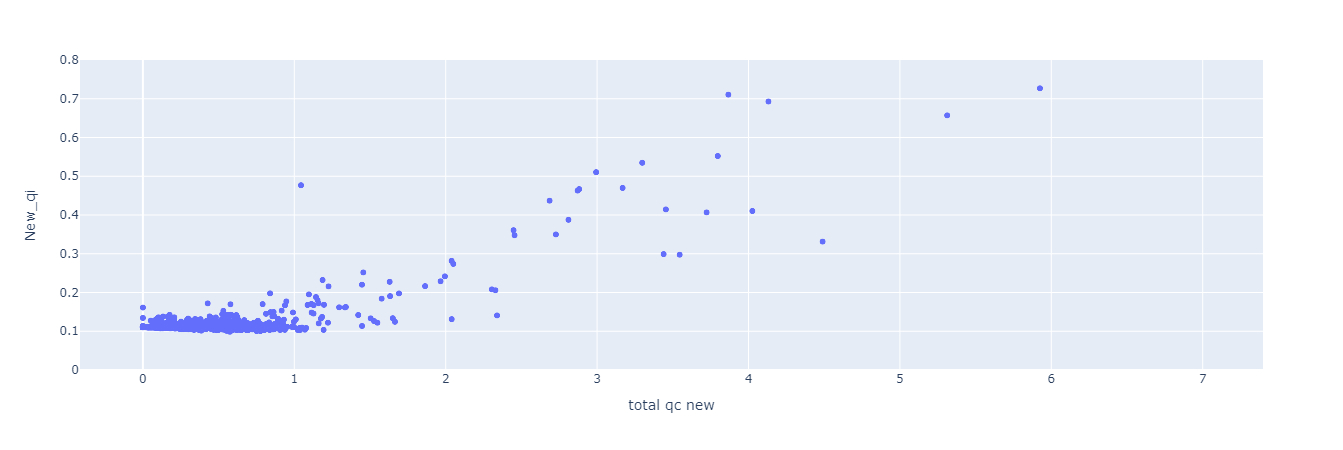

In [412]:
fig = px.scatter(pd_parent.xs("MB_1000", level="Stimulus name").reset_index(), x="total qc new", y="New_qi", 
                 hover_name="Cell index", hover_data=["Nr of Spikes"])
#fig.update_yaxes(range=[0, .8])
fig.show()

In [347]:
sum(pd_parent1['total qc new']>2)

64

#### Structuring dataframe in Overview.Dataframe - compatible configuration, while throwing away or columns but Spikes/New_qi/Total qc new

In [579]:
pd_parent.drop(pd_parent.columns[1:10], axis=1, inplace=True)
pd_parent.sort_index(level=['Cell index',], ascending=[True,], inplace=True)
pd_parent['Stimulus ID']=list(range(len(pd_parent.index.unique(1))))*int(len(pd_parent)/len(pd_parent.index.unique(1)))
pd_parent.set_index('Stimulus ID', append=True, inplace=True)
pd_parent= pd_parent.reorder_levels([1, 'Stimulus ID',2,3,4,5,6])

In [648]:
pd_parent1

Spikes  \
Cell index Stimulus ID Centres x   Centres y   Nr of Spikes Area     Stimulus name                                                      
7          0           2435.107689 2225.055096 5343         5.888642 FFF            [70, 624, 827, 1129, 1221, 3047, 3240, 3454, 4...   
           1           2435.107689 2225.055096 5296         5.836842 Chirp          [491, 975, 1812, 2551, 2873, 3896, 4148, 4644,...   
           2           2435.107689 2225.055096 7063         7.784293 MB_1000        [688, 1363, 1673, 3447, 3936, 5881, 6823, 7885...   
           3           2435.107689 2225.055096 5947         6.554324 MB_1200        [118, 319, 1860, 2104, 4643, 5632, 7553, 8251,...   
           4           2435.107689 2225.055096 7723         8.511694 MB_800         [178, 549, 1191, 1646, 1749, 2004, 2085, 2175,...   
...                                                                                                                               ...   
6119       2           298.834031  629.158969  7            0.007715 MB_1000        [392810, 839868, 979882, 3286645, 3811338, 529...   
           3           298.834031  629.158969  7            0.007715 MB_1200        [294565, 294601, 297206, 961145, 1287822, 1314...   
           4           298.834031  629.158969  4            0.004408 MB_800         [1409436, 5438312, 5438347, 5440954, --, --, -...   
           5           298.834031  629.158969  3            0.003306 MB_1400        [514771, 2529127, 2854469, --, --, --, --, --,...   
           6           298.834031  629.158969  3            0.003306 MB_600         [3592633, 4146774, 6162557, --, --, --, --, --...   

                                                                                      New_qi  \
Cell index Stimulus ID Centres x   Centres y   Nr of Spikes Area     Stimulus name             
7          0           2435.107689 2225.055096 5343         5.888642 FFF                 NaN   
           1           2435.107689 2225.055096 5296         5.836842 Chirp               NaN   
           2           2435.107689 2225.055096 7063         7.784293 MB_1000             NaN   
           3           2435.107689 2225.055096 5947         6.554324 MB_1200             NaN   
           4           2435.107689 2225.055096 7723         8.511694 MB_800              NaN   
...                                                                                      ...   
6119       2           298.834031  629.158969  7            0.007715 MB_1000        0.110719   
           3           298.834031  629.158969  7            0.007715 MB_1200        0.110772   
           4           298.834031  629.158969  4            0.004408 MB_800         0.111005   
           5           298.834031  629.158969  3            0.003306 MB_1400        0.110937   
           6           298.834031  629.158969  3            0.003306 MB_600         0.111031   

                                                                                    total qc new  
Cell index Stimulus ID Centres x   Centres y   Nr of Spikes Area     Stimulus name                
7          0           2435.107689 2225.055096 5343         5.888642 FFF                1.778320  
           1           2435.107689 2225.055096 5296         5.836842 Chirp              2.579757  
           2           2435.107689 2225.055096 7063         7.784293 MB_1000            2.374208  
           3           2435.107689 2225.055096 5947         6.554324 MB_1200            2.665497  
           4           2435.107689 2225.055096 7723         8.511694 MB_800             2.459428  
...                                                                                          ...  
6119       2           298.834031  629.158969  7            0.007715 MB_1000            0.157691  
           3           298.834031  629.158969  7            0.007715 MB_1200            0.000000  
           4           298.834031  629.158969  4            0.004408 MB_800             0.000000  
       

In [647]:
pd_parent.to_pickle(Test_stimulus.recording_folder+"spikes_for_overview", compression="zip")
Test_stimulus.stimuli.to_pickle(Test_stimulus.recording_folder+"stimulus_overview", compression="zip")

In [367]:
condition1=((pd_parent.xs("FFF", level="Stimulus name")['New_qi'])>0.155)
condition2=((pd_parent.xs("FFF", level="Stimulus name")['total qc new'])<2)
pd_parent.xs("FFF", level="Stimulus name")[condition1&condition2]

,,,,,Spikes,New_qi,Max isi,Std sync,Max psth,Total qc,stimulus spikes,Histogram,Bins,ISI mean,mean sync,total qc new
Cell index,Centres x,Centres y,Nr of Spikes,Area,,,,,,,,,,,,
12,2478.122499,1554.070952,2983,3.287632,"[2648, 3846, 6199, 8094, 9595, 10377, 13145, 1...",0.158033,0.745961,0.191518,14.0,2.000107,5962.0,"[3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 6.0, 6.0, 7.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.529727,0.244467,1.558147
19,1301.405200,2141.822655,2744,3.024225,"[1914, 2531, 2665, 3635, 3912, 6036, 6862, 786...",0.160342,0.732305,0.198094,14.0,2.030918,5484.0,"[6.0, 6.0, 5.0, 5.0, 9.0, 9.0, 7.0, 7.0, 4.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.526796,0.297474,1.711074
26,1.073814,42.114014,60,0.066127,"[875, 72280, 143686, 215100, 286507, 357913, 4...",17.055595,0.199992,0.158868,11.0,0.349497,118.0,"[10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.089163,0.936111,1.872688
547,1318.471098,1502.962461,208,0.229242,"[115830, 116637, 120168, 191218, 258192, 25902...",0.290388,0.787009,0.179180,10.0,1.410166,414.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.606349,0.283441,1.745089
692,1270.533281,767.213461,210,0.231446,"[113058, 116345, 117475, 119084, 119545, 12098...",0.290017,0.751611,0.178642,9.0,1.208421,418.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.595334,0.291732,1.542571
830,1127.158517,1596.749531,128,0.141072,"[75459, 76060, 121834, 147081, 148497, 220031,...",0.286570,0.818099,0.218091,8.0,1.427359,254.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.592843,0.295435,1.727236
1089,932.402326,507.476396,87,0.095885,"[115589, 116897, 189763, 261051, 264938, 33100...",0.175841,0.778959,0.262274,5.0,1.021503,172.0,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.517457,0.255051,1.361698
1196,1432.125543,963.141263,59,0.065025,"[14995, 291663, 571812, 620759, 646707, 647283...",0.228500,0.710942,0.189722,6.0,0.809289,116.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.542224,0.170370,1.138970
1224,1122.549949,1766.554489,190,0.209403,"[115431, 118093, 118575, 120766, 123466, 18943...",0.241196,0.769800,0.162736,9.0,1.127465,378.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009743465510306, 0.05009743465510306...",0.586543,0.279232,1.431531


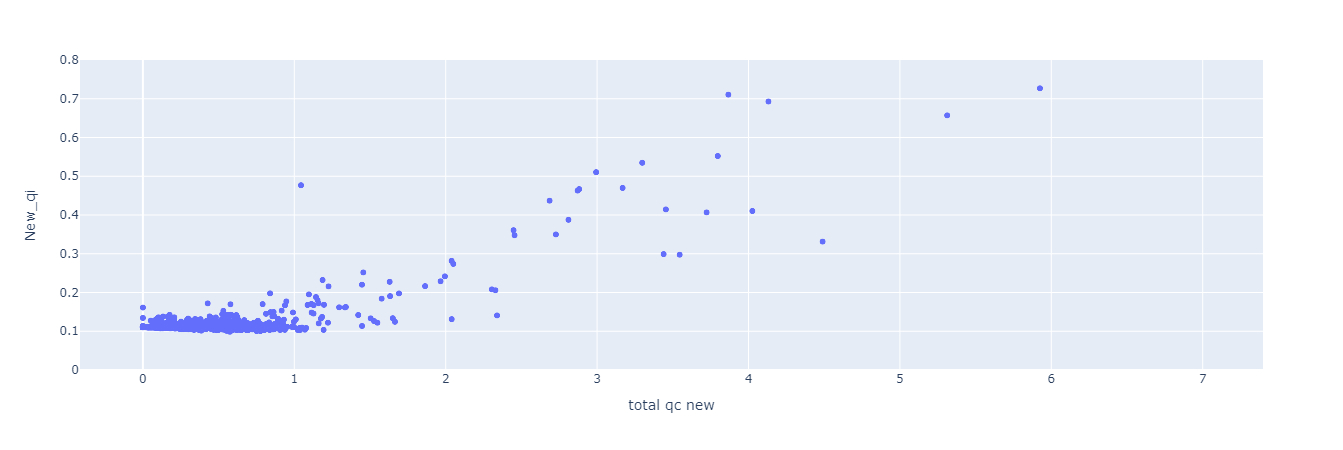

In [558]:
fig = px.scatter(pd_parent.xs("MB_1000", level="Stimulus name").reset_index(), x="total qc new", y="New_qi", 
                 hover_name="Cell index", hover_data=["Nr of Spikes"])
fig.update_yaxes(range=[0, .8])
fig.show()

#### Create a zipper between stimuli index/phase duration/and bool homogeneity (for example FFF are alignable for trial, Chirp is not) so you get all plots per cell

In [565]:
stim_idxs=[0, 1, 2, 3]
phase_durs=[4, 78, 4, 3.5]
inhomos=[False, True, False, False]
colors=['#FE7C7C', '#FAFE7C', '#8AFE7C', '#7CFCFE', '#7C86FE', '#FE7CFE']

0 4


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



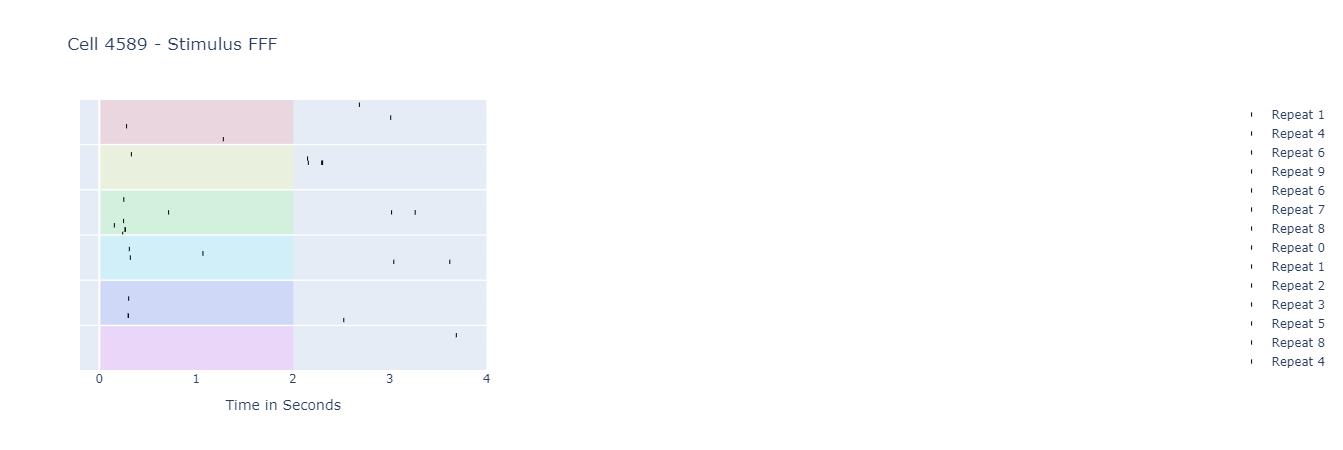

1 78


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



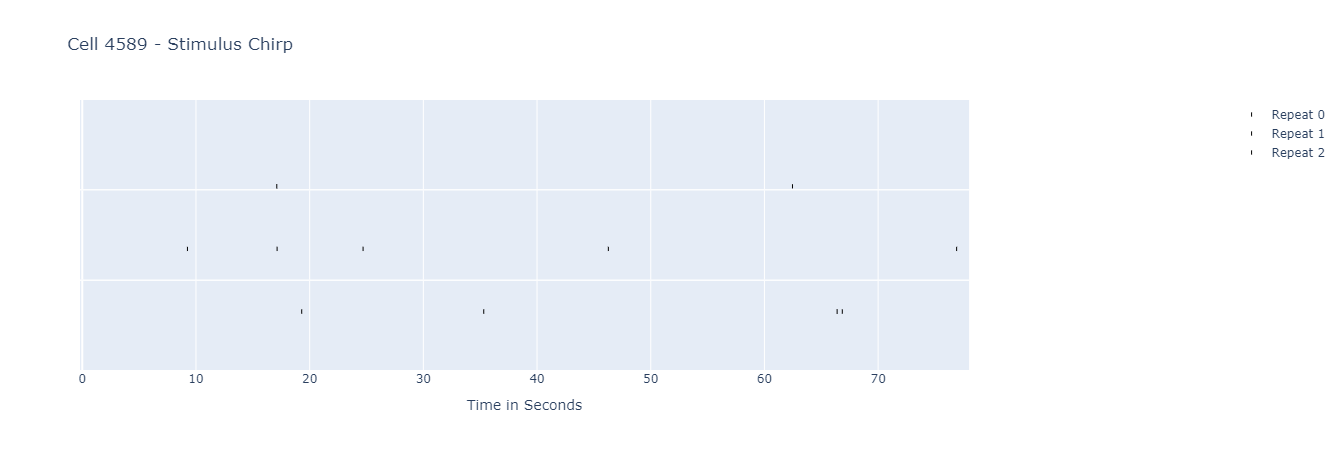

2 4


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



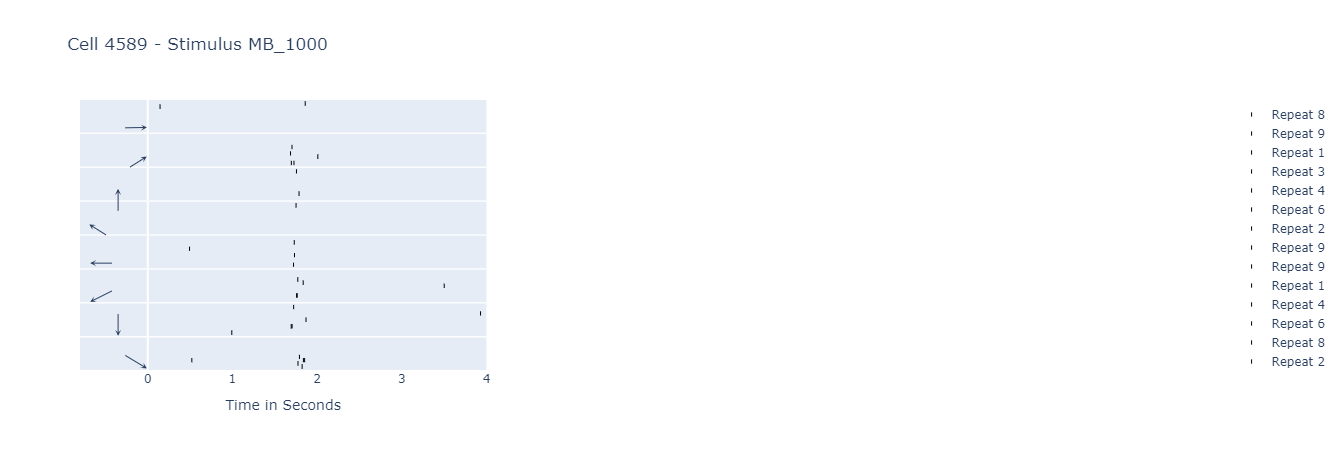

3 3.5


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



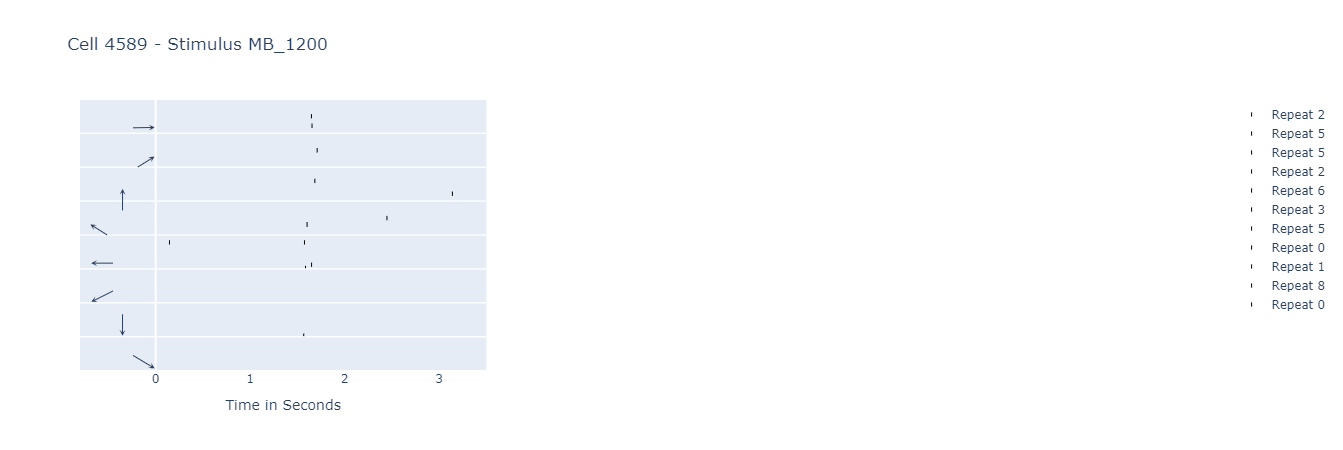

In [571]:
cell_of_int= 4589#4054#547#2718#2875
for stim_idx, phase_dur, inhomo in zip(stim_idxs,phase_durs,inhomos):
    stimulus_extr.load_spikes_for_stimulus(stim_idx)
    stimulus_traits=Basic.get_stimulus_traits(Test_stimulus.stimuli, stim_idx)

    cell_spikes=Basic.kerberos_spiketrains_per_stimulus(cell_of_int, stimulus_extr.spikes_stimulus, stimulus_traits, phase_dur, Test_stimulus.sampling_frequency[0], inhomo)
    figure=Basic.plot_sc_aligned_new(cell_of_int, cell_spikes, stimulus_traits, phase_dur, colors)
    figure.show()

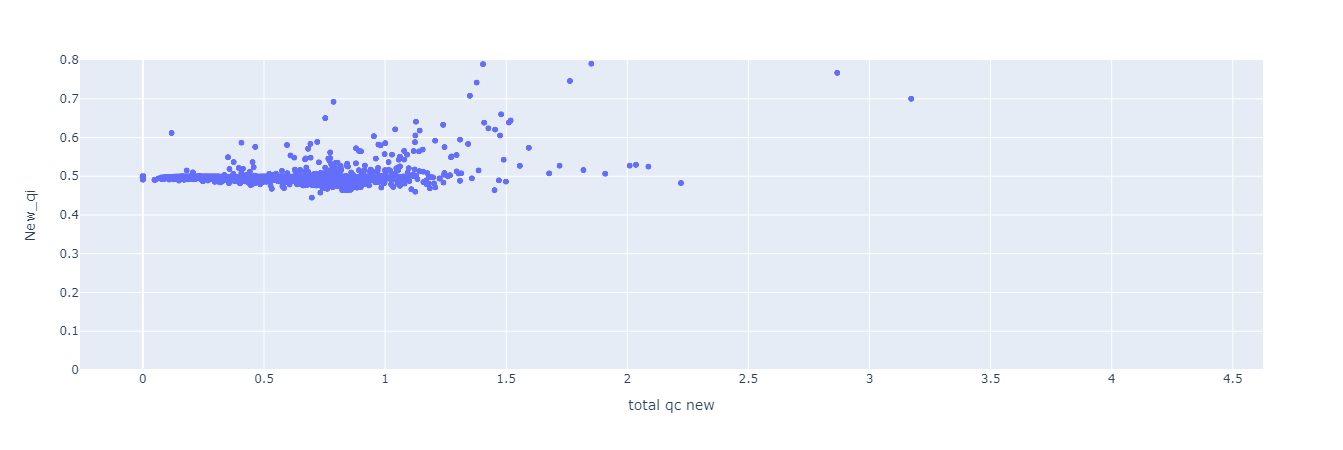

In [537]:
fig = px.scatter(pd_parent1.xs("Chirp", level="Stimulus name").reset_index(), x="total qc new", y="New_qi", 
                 hover_name="Cell index", hover_data=["Nr of Spikes"])
fig.update_yaxes(range=[0, .8])
fig.show()

In [551]:
condition1=((pd_parent.xs("Chirp", level="Stimulus name")['New_qi'])>0.55)
condition2=(pd_parent.xs("Chirp", level="Stimulus name").index.get_level_values(3)>45)
pd_parent.xs("Chirp", level="Stimulus name")[condition1&condition2]

,,,,,Spikes,New_qi,Max isi,Std sync,Max psth,Total qc,stimulus spikes,Histogram,Bins,ISI mean,mean sync,total qc new
Cell index,Centres x,Centres y,Nr of Spikes,Area,,,,,,,,,,,,
14,1806.220950,1850.088862,2903,3.199462,"[2074, 2657, 3565, 5604, 6020, 6190, 13129, 13...",0.699964,0.959325,0.331595,11.0,3.499182,5802.0,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.572079,0.284138,3.172407
46,2311.179183,1730.109697,912,1.005136,"[6844, 9622, 21220, 25762, 44985, 46577, 59613...",1.084936,0.946964,0.383327,7.0,2.540977,1822.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.446639,0.570175,2.671409
145,1259.961317,1438.092146,768,0.846430,"[25669, 118139, 118549, 118849, 119140, 119378...",1.529433,0.977775,0.367366,9.0,3.232809,1534.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.502312,0.517601,3.308387
150,2354.634263,1582.144010,711,0.783609,"[14639, 46464, 47252, 49038, 56302, 118026, 11...",0.924073,0.977956,0.315630,8.0,2.469380,1420.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.669061,0.259831,2.485752
222,1553.512183,1312.599638,381,0.419909,"[32167, 48933, 123010, 152583, 228657, 229050,...",0.868097,0.969550,0.333140,7.0,2.260973,760.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.635517,0.321990,2.372204
261,1272.294356,741.556077,452,0.498159,"[27676, 34889, 117802, 118786, 119028, 119766,...",0.883767,0.988135,0.343095,6.0,2.034144,902.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.603224,0.337748,2.095448
286,1574.739543,1210.081700,528,0.581921,"[12929, 117553, 118367, 119231, 123046, 128509...",0.999759,0.966328,0.339384,6.0,1.967737,1054.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.610357,0.338374,2.053818
330,1441.073879,1429.395194,388,0.427624,"[57564, 57959, 147320, 163608, 165614, 248400,...",1.153464,0.984924,0.298543,8.0,2.352338,774.0,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.665537,0.219716,2.414088
335,1217.152728,833.739528,353,0.389049,"[57014, 122123, 164139, 164705, 164871, 165736...",1.429213,0.961013,0.362981,10.0,3.488289,704.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05002963253251269, 0.05002963253251269...",0.587513,0.341808,3.697575
